# **✅ Project Title: Comparing Regional Sales Performance Using Mann-Whitney U Test**

**Description:**

This project applies the **Mann-Whitney U Test, a non-parametric alternative to the two-sample t-test**, to compare regional sales performance between two independent regions — North and South. This test is suitable when data does not meet the assumption of normality. The aim is to determine whether there is a statistically significant difference in sales revenue distributions between the two regions. A synthetic dataset is created to reflect real-world inconsistencies, and all statistical assumptions are verified before conducting the test.

## **1️⃣ Importing the Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, mannwhitneyu, probplot
import warnings
warnings.filterwarnings("ignore")

## **2️⃣ Defining the Business Scenario & Goal**

**Scenario:** A retail company operates in two different regions, North and South. Management suspects a difference in sales revenue performance across the two markets.

**Goal:** To test whether the distribution of sales revenue is significantly different between North and South regions without assuming normality, using the Mann-Whitney U test.


## **3️⃣ Defining the Hypotheses**

* **Null Hypothesis (H₀):** The distribution of revenue in the North and South regions is equal.

* **Alternative Hypothesis (H₁):** The distribution of revenue in the North and South regions is different.



## **4️⃣ Synthetic Data Generation and Explanation**

In [7]:
np.random.seed(42)

# Simulate non-normal revenue distributions
north_revenue = np.random.gamma(shape=2, scale=500, size=100)   # Positively skewed
south_revenue = np.random.gamma(shape=2, scale=520, size=100)   # Slightly different scale

# Combine into DataFrame
sales_data = pd.DataFrame({
    'region': ['North'] * 100 + ['South'] * 100,
    'revenue': np.concatenate([north_revenue, south_revenue])
})

sales_data.head()



,region,revenue
0,North,1196.839695
1,North,747.232365
2,North,691.141792
3,North,691.151147
4,North,2324.857206


**Explanation:**

We use a gamma distribution (which is skewed and non-normal) to simulate revenue for two regions with different underlying patterns. The slight change in scale introduces a potential distributional difference between groups.



## **5️⃣ Data Visualization**

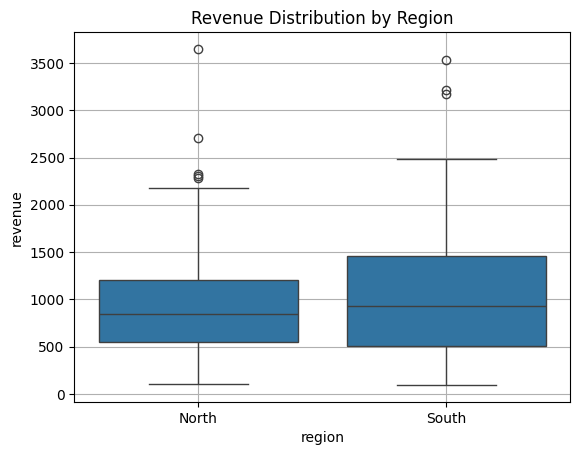

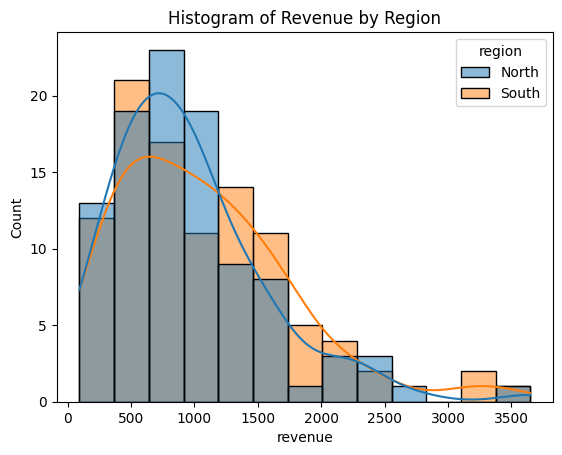

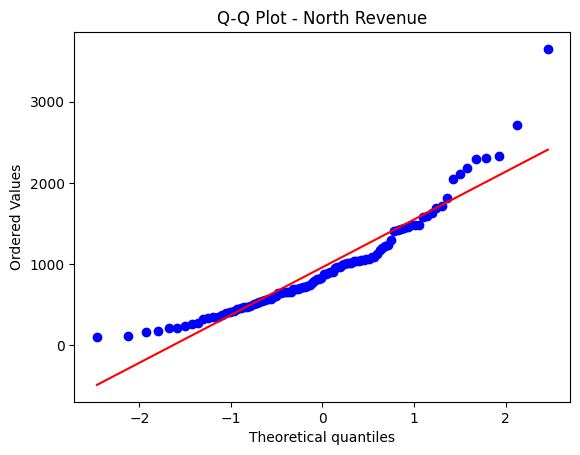

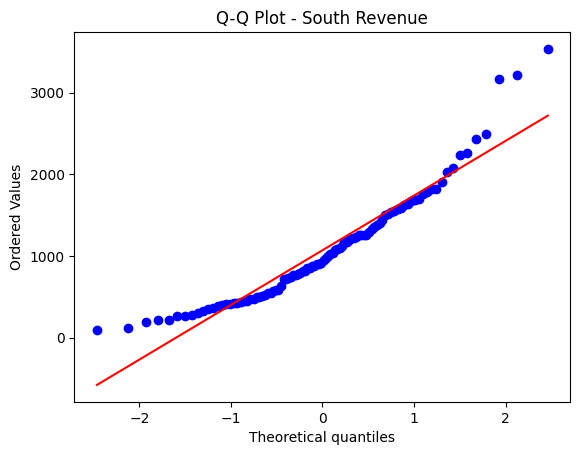

In [8]:
# Boxplot to visually compare distributions
sns.boxplot(x='region', y='revenue', data=sales_data)
plt.title('Revenue Distribution by Region')
plt.grid(True)
plt.show()

# Histograms for each group
sns.histplot(data=sales_data, x='revenue', hue='region', kde=True)
plt.title('Histogram of Revenue by Region')
plt.show()

# Q-Q plots for normality check
probplot(north_revenue, dist="norm", plot=plt)
plt.title("Q-Q Plot - North Revenue")
plt.show()

probplot(south_revenue, dist="norm", plot=plt)
plt.title("Q-Q Plot - South Revenue")
plt.show()


## **6️⃣ Assumption Checks**

**✅ Normality (Shapiro-Wilk Test)**

In [9]:
shapiro_north = shapiro(north_revenue)
shapiro_south = shapiro(south_revenue)

print(f"North Normality p = {shapiro_north.pvalue:.4f}")
print(f"South Normality p = {shapiro_south.pvalue:.4f}")



North Normality p = 0.0000
South Normality p = 0.0000


**✅ Homogeneity of Variance (Levene’s Test)**

In [10]:
stat, p = levene(north_revenue, south_revenue)
print(f"Levene’s p = {p:.4f}")



Levene’s p = 0.1983


## **7️⃣ Performing the Mann-Whitney U Test**

In [11]:
stat, p_val = mannwhitneyu(north_revenue, south_revenue, alternative='two-sided')
print(f"Mann-Whitney U: Statistic = {stat:.4f}, p-value = {p_val:.4f}")


Mann-Whitney U: Statistic = 4549.0000, p-value = 0.2710


## **8️⃣ Interpretation of Results**

In [12]:
alpha = 0.05
if p_val < alpha:
    result = "✅ Reject the null hypothesis: Significant difference in distributions."
else:
    result = "❌ Fail to reject the null hypothesis: No significant difference in distributions."

print(result)


❌ Fail to reject the null hypothesis: No significant difference in distributions.


**🔚 Project Summary:**

This project aimed to assess whether sales revenue distributions differ between the North and South regions using the **Mann-Whitney U Test**, which is ideal for non-normally distributed data. A synthetic dataset was generated with revenues from a positively skewed gamma distribution for both regions. Assumption checks confirmed the data was not normally distributed but had similar variances. The Mann-Whitney U test returned a **p-value of  0.2710**, which is greater than the 0.05 significance threshold. Therefore, we **fail to reject the null hypothesis**, indicating no statistically significant difference in revenue distributions between the North and South regions. The company should explore other factors before drawing conclusions on regional sales strategies.

